In [1]:
#inks to fallow :

# 1> https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

# i am fallowing link 2 for this case 

# 2> https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63

# 3>https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/

# 4>https://gist.github.com/lrhache/7686903

# 5>https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/2-Exploratory-Data-Analysis.ipynb

In [2]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
print (nltk.download('stopwords'))

True


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/siddharth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_rev.csv')
data_1=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_2_to_10.csv')
data_2=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_11_to_19.csv')
data_3=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_20_to_30.csv')
data_4=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_31_to_37.csv')

In [4]:
frames = [data, data_1, data_2,data_3,data_4]


result = pd.concat(frames,ignore_index=True)

In [5]:
result 

Unnamed: 0                   date  \
0             0  posted on 05 Sep 2018   
1             1  posted on 12 Aug 2020   
2             2  posted on 26 Jul 2019   
3             3  posted on 29 Aug 2020   
4             4  posted on 21 Aug 2020   
..          ...                    ...   
514          65  posted on 29 Jan 2020   
515          66  posted on 07 Jun 2020   
516          67  posted on 04 Jun 2020   
517          68  posted on 05 Jun 2020   
518          69  posted on 13 Mar 2020   

                                             tital  \
0                      System Engineer  in Kolkata   
1                           It Analyst  in Kolkata   
2               Associate Consultant  in Bangalore   
3       Assistant Consultant (ITIS)  in Whitefield   
4               Assistant System Engineer  in Pune   
..                                             ...   
514                         It Analyst  in Kolkata   
515                             Associate  in Pune   
516  Office Boy for 4.9 years in Kolkata, Rajarhat   
517              Senior Associate  in Pune Bhosari   
518      Associate Technical Consultant  in Mumbai   

                                                  user  \
0                     Anonymous · Finance Division       
1                         Anonymous · IoT Division       
2                         Anonymous · EIS Division       
3                        Anonymous · ITIS Division       
4                 Anonymous · It Services Division       
..                                                 ...   
514                       Anonymous · bfs Division       
515               Anonymous · Us Mortgage Division       
516   Anonymous · Former Employee · Office boy Divi...   
517         Anonymous · Banking & Finance Division       
518                       Anonymous · BPO Division       

                                               dislike  \
0    Dislikes 1. Growth: Not much scope of growth. ...   
1    Dislikes Some of the managers are lagging with...   
2    Dislikes 1. First of all, everybody in TCS are...   
3     Dislikes Nothing to dislike about working at TCS   
4    Dislikes Salary appraisal is very low for begi...   
..                                                 ...   
514  Dislikes 1.Poor Work Life balance, specially i...   
515             Dislikes No opportunity to join again    
516                           Dislikes Admin pressures   
517                                   Dislikes nothing   
518  Dislikes The company's alumni portal services ...   

                                                  like  page_index  rating  
0    Likes Few things that are good: \r\n1. Job sec...           2     NaN  
1    Likes I am carrying company provided laptop be...           2     NaN  
2    Likes You can draw salary without doing any wo...           2     NaN  
3    Likes Good and excellent job security provided...           2     NaN  
4    Likes Apart from Job security the company prov...           2     NaN  
..                                                 ...         ...     ...  
514                                Likes Job Security.          37     2.0  
515  Likes This is Ganesh currently I am not a empl...          37     5.0  
516                 Likes I am not working right now 😔          37     5.0  
517  Likes traning language is very soft.no politic...          37     4.0  
518  Likes The company is better with their monthly...          37     5.0  

[519 rows x 8 columns]

In [6]:
data1=result 

In [7]:
data1.insert(7, "clean_round_1","")


In [8]:
data1

Unnamed: 0                   date  \
0             0  posted on 05 Sep 2018   
1             1  posted on 12 Aug 2020   
2             2  posted on 26 Jul 2019   
3             3  posted on 29 Aug 2020   
4             4  posted on 21 Aug 2020   
..          ...                    ...   
514          65  posted on 29 Jan 2020   
515          66  posted on 07 Jun 2020   
516          67  posted on 04 Jun 2020   
517          68  posted on 05 Jun 2020   
518          69  posted on 13 Mar 2020   

                                             tital  \
0                      System Engineer  in Kolkata   
1                           It Analyst  in Kolkata   
2               Associate Consultant  in Bangalore   
3       Assistant Consultant (ITIS)  in Whitefield   
4               Assistant System Engineer  in Pune   
..                                             ...   
514                         It Analyst  in Kolkata   
515                             Associate  in Pune   
516  Office Boy for 4.9 years in Kolkata, Rajarhat   
517              Senior Associate  in Pune Bhosari   
518      Associate Technical Consultant  in Mumbai   

                                                  user  \
0                     Anonymous · Finance Division       
1                         Anonymous · IoT Division       
2                         Anonymous · EIS Division       
3                        Anonymous · ITIS Division       
4                 Anonymous · It Services Division       
..                                                 ...   
514                       Anonymous · bfs Division       
515               Anonymous · Us Mortgage Division       
516   Anonymous · Former Employee · Office boy Divi...   
517         Anonymous · Banking & Finance Division       
518                       Anonymous · BPO Division       

                                               dislike  \
0    Dislikes 1. Growth: Not much scope of growth. ...   
1    Dislikes Some of the managers are lagging with...   
2    Dislikes 1. First of all, everybody in TCS are...   
3     Dislikes Nothing to dislike about working at TCS   
4    Dislikes Salary appraisal is very low for begi...   
..                                                 ...   
514  Dislikes 1.Poor Work Life balance, specially i...   
515             Dislikes No opportunity to join again    
516                           Dislikes Admin pressures   
517                                   Dislikes nothing   
518  Dislikes The company's alumni portal services ...   

                                                  like  page_index  \
0    Likes Few things that are good: \r\n1. Job sec...           2   
1    Likes I am carrying company provided laptop be...           2   
2    Likes You can draw salary without doing any wo...           2   
3    Likes Good and excellent job security provided...           2   
4    Likes Apart from Job security the company prov...           2   
..                                                 ...         ...   
514                                Likes Job Security.          37   
515  Likes This is Ganesh currently I am not a empl...          37   
516                 Likes I am not working right now 😔          37   
517  Likes traning language is very soft.no politic...          37   
518  Likes The company is better with their monthly...          37   

    clean_round_1  rating  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
..            ...     ...  
514                   2.0  
515                   5.0  
516                   5.0  
517                   4.0  
518                   5.0  

[519 rows x 9 columns]

In [9]:
import re
import string

def clean_text_round1(text):
    #print (text)
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
   # print(text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
   # print(text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    text=re.sub('\r', '', text)
    #removing like from the first
    text = text.split(' ', 1)[1]
    print(text)
    return text

In [10]:
for i in range(0,len(data1)):
    data1.clean_round_1[i]=clean_text_round1(str(data1.like[i]))

few things that are good  job security in my opinion  of the  people who are in tcs is because of job security tcs holds onto their employees even in tough situations in market although there was a large layoff in recent past still job security is a plus balance  it is good most of the time there are no pressure and also work is not much challenging so usually after the timid learning curve it is   easy workwise in support projects timing may be an issue because one may have to support weekend or at night but those are compensated in development projects timing at beginning is casual but at time of delivery it is haywire because always there are no time but lot of development left this should give an idea of poor management benefits nice health benefits for employee and family easy on leaves about maternity wedding etc read more
i am carrying company provided laptop before this pandemic hits in as a devops engineer i already have vpn and admin privileges turned on long before i have no

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
data1.clean_round_1[0]

'few things that are good  job security in my opinion  of the  people who are in tcs is because of job security tcs holds onto their employees even in tough situations in market although there was a large layoff in recent past still job security is a plus balance  it is good most of the time there are no pressure and also work is not much challenging so usually after the timid learning curve it is   easy workwise in support projects timing may be an issue because one may have to support weekend or at night but those are compensated in development projects timing at beginning is casual but at time of delivery it is haywire because always there are no time but lot of development left this should give an idea of poor management benefits nice health benefits for employee and family easy on leaves about maternity wedding etc read more'

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [13]:
data1["clean_round_1"]=data1["clean_round_1"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [14]:
data1["clean_round_1"]

0      things good job security opinion people tcs jo...
1      carrying company provided laptop pandemic hits...
2      draw salary without work even without going of...
3      good excellent job security provided tcs pande...
4      apart job security company provides various op...
                             ...                        
514                                         job security
515    ganesh currently employee tcs still love exper...
516                                      working right 😔
517    traning language softno politics workingjob al...
518    company better monthly payments benefits etc b...
Name: clean_round_1, Length: 519, dtype: object

In [15]:
data1

Unnamed: 0                   date  \
0             0  posted on 05 Sep 2018   
1             1  posted on 12 Aug 2020   
2             2  posted on 26 Jul 2019   
3             3  posted on 29 Aug 2020   
4             4  posted on 21 Aug 2020   
..          ...                    ...   
514          65  posted on 29 Jan 2020   
515          66  posted on 07 Jun 2020   
516          67  posted on 04 Jun 2020   
517          68  posted on 05 Jun 2020   
518          69  posted on 13 Mar 2020   

                                             tital  \
0                      System Engineer  in Kolkata   
1                           It Analyst  in Kolkata   
2               Associate Consultant  in Bangalore   
3       Assistant Consultant (ITIS)  in Whitefield   
4               Assistant System Engineer  in Pune   
..                                             ...   
514                         It Analyst  in Kolkata   
515                             Associate  in Pune   
516  Office Boy for 4.9 years in Kolkata, Rajarhat   
517              Senior Associate  in Pune Bhosari   
518      Associate Technical Consultant  in Mumbai   

                                                  user  \
0                     Anonymous · Finance Division       
1                         Anonymous · IoT Division       
2                         Anonymous · EIS Division       
3                        Anonymous · ITIS Division       
4                 Anonymous · It Services Division       
..                                                 ...   
514                       Anonymous · bfs Division       
515               Anonymous · Us Mortgage Division       
516   Anonymous · Former Employee · Office boy Divi...   
517         Anonymous · Banking & Finance Division       
518                       Anonymous · BPO Division       

                                               dislike  \
0    Dislikes 1. Growth: Not much scope of growth. ...   
1    Dislikes Some of the managers are lagging with...   
2    Dislikes 1. First of all, everybody in TCS are...   
3     Dislikes Nothing to dislike about working at TCS   
4    Dislikes Salary appraisal is very low for begi...   
..                                                 ...   
514  Dislikes 1.Poor Work Life balance, specially i...   
515             Dislikes No opportunity to join again    
516                           Dislikes Admin pressures   
517                                   Dislikes nothing   
518  Dislikes The company's alumni portal services ...   

                                                  like  page_index  \
0    Likes Few things that are good: \r\n1. Job sec...           2   
1    Likes I am carrying company provided laptop be...           2   
2    Likes You can draw salary without doing any wo...           2   
3    Likes Good and excellent job security provided...           2   
4    Likes Apart from Job security the company prov...           2   
..                                                 ...         ...   
514                                Likes Job Security.          37   
515  Likes This is Ganesh currently I am not a empl...          37   
516                 Likes I am not working right now 😔          37   
517  Likes traning language is very soft.no politic...          37   
518  Likes The company is better with their monthly...          37   

                                         clean_round_1  rating  
0    things good job security opinion people tcs jo...     NaN  
1    carrying company provided laptop pandemic hits...     NaN  
2    draw salary without work even without going of...     NaN  
3    good excellent job security provided tcs pande...     NaN  
4    apart job security company provides various op...     NaN  
..                                                 ...     ...  
514                                       job security     2.0  
515  ganesh currently employee tcs still love exper...     5.0  
516                            

In [16]:
#lots of NaN 
data1[data1.isna().any(axis=1)

SyntaxError: unexpected EOF while parsing (<ipython-input-16-36a09d01f4cc>, line 2)

In [17]:
data1.insert(8, "without_sw_and_punctuation_numbers", "")

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
df = pd.DataFrame()
df.insert(0,"without_sw_and_punctuation_numbers", "") 
for i in range(0,len(data1.clean_round_1)):
    text = data1.clean_round_1[i]
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    data1.without_sw_and_punctuation_numbers[i]=tokens_without_sw

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
data1.without_sw_and_punctuation_numbers[0]

['things',
 'good',
 'job',
 'security',
 'opinion',
 'people',
 'tcs',
 'job',
 'security',
 'tcs',
 'holds',
 'onto',
 'employees',
 'even',
 'tough',
 'situations',
 'market',
 'although',
 'large',
 'layoff',
 'recent',
 'past',
 'still',
 'job',
 'security',
 'plus',
 'balance',
 'good',
 'time',
 'pressure',
 'work',
 'much',
 'challenging',
 'usually',
 'timid',
 'learning',
 'curve',
 'easy',
 'workwise',
 'support',
 'projects',
 'timing',
 'may',
 'issue',
 'may',
 'support',
 'weekend',
 'night',
 'compensated',
 'development',
 'projects',
 'timing',
 'beginning',
 'casual',
 'time',
 'delivery',
 'haywire',
 'always',
 'time',
 'lot',
 'development',
 'left',
 'give',
 'idea',
 'poor',
 'management',
 'benefits',
 'nice',
 'health',
 'benefits',
 'employee',
 'family',
 'easy',
 'leaves',
 'maternity',
 'wedding',
 'etc',
 'read']

In [20]:
from collections import Counter 
#Counter = ''
for i in data1.clean_round_1:
    #print(i)
    # split() returns list of all the words in the string 
    split_it = i.split() 
    # Pass the split_it list to instance of Counter class. 
    #print(Counter)
    Counter_1 = Counter(split_it) 
    #print(Counter)
    # most_common() produces k frequently encountered 
    # input values and their respective counts. 
    most_occur = Counter_1.most_common(4) 
    print(most_occur) 

[('job', 3), ('security', 3), ('time', 3), ('good', 2)]
[('company', 2), ('carrying', 1), ('provided', 1), ('laptop', 1)]
[('without', 2), ('draw', 1), ('salary', 1), ('work', 1)]
[('good', 2), ('excellent', 2), ('job', 1), ('security', 1)]
[('company', 2), ('various', 2), ('apart', 1), ('job', 1)]
[('work', 2), ('tcs', 1), ('started', 1), ('precautionary', 1)]
[('lot', 2), ('change', 2), ('job', 1), ('security', 1)]
[('tcs', 1), ('support', 1), ('extraordinary', 1), ('pandemic', 1)]
[('good', 5), ('project', 3), ('one', 3), ('tcs', 2)]
[('best', 2), ('company', 2), ('work', 2), ('tcs', 1)]
[('security', 1)]
[('job', 1), ('security', 1), ('thing', 1), ('would', 1)]
[('tata', 2), ('company', 1), ('comes', 1), ('heartfully', 1)]
[('work', 1), ('life', 1), ('balance', 1)]
[('good', 2), ('job', 1), ('security', 1), ('people', 1)]
[('good', 3), ('learning', 2), ('like', 2), ('location', 2)]
[('good', 2), ('people', 2), ('looking', 1), ('challenging', 1)]
[('company', 2), ('covid', 2), ('inc

In [21]:
#bag of words
# Python3 code for preprocessing text 
import nltk 
import re 
import numpy as np 
  
# execute the text here as : 
# text = """ # place text here  """ 
dataset =  data1.clean_round_1
for i in range(len(dataset)): 
    dataset[i] = dataset[i].lower() 
    dataset[i] = re.sub(r'\W', ' ', dataset[i]) 
    dataset[i] = re.sub(r'\s+', ' ', dataset[i]) 


/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [22]:

# Creating the Bag of Words model 
word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1


In [23]:

import heapq 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
print(freq_words)

['tcs', 'work', 'good', 'company', 'job', 'security', 'working', 'employees', 'home', 'like', 'support', 'also', 'covid', 'salary', 'life', 'one', 'environment', 'time', 'project', 'people', 'balance', 'culture', 'employee', 'situation', 'best', 'learning', 'team', 'pandemic', 'get', 'us', 'career', 'provided', 'lot', 'management', 'office', 'thing', 'providing', 'growth', 'opportunities', 'different', 'part', 'every', 'experience', 'much', 'tata', 'policies', 'well', 'even', 'new', 'great', 'still', 'projects', 'location', 'got', 'opportunity', 'health', 'things', 'always', 'companies', 'say', 'happy', 'help', 'care', 'place', 'read', 'years', 'proud', 'training', 'family', 'wfh', 'associates', 'supporting', 'overall', 'really', 'organization', 'dont', 'facilities', 'feel', 'want', 'development', 'come', 'supportive', 'know', 'give', 'better', 'depends', 'due', 'leave', 'worked', 'many', 'lockdown', 'given', 'never', 'learn', 'hike', 'teammates', 'hr', 'benefits', 'would', 'excellent'

In [24]:

X = [] 
for data in dataset: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 


In [25]:
X

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [26]:
import nltk

from nltk.tokenize import word_tokenize
reviews = data1.clean_round_1.str.cat(sep=' ')#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

1859


['tcs',
 'work',
 'good',
 'company',
 'job',
 'security',
 'working',
 'employees',
 'home',
 'like',
 'support',
 'also',
 'covid',
 'salary',
 'life',
 'one',
 'environment',
 'time',
 'project',
 'people',
 'balance',
 'culture',
 'employee',
 'situation',
 'best',
 'learning',
 'team',
 'pandemic',
 'get',
 'us',
 'career',
 'provided',
 'lot',
 'management',
 'office',
 'thing',
 'providing',
 'growth',
 'opportunities',
 'different',
 'part',
 'every',
 'experience',
 'much',
 'tata',
 'policies',
 'well',
 'even',
 'new',
 'great']

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

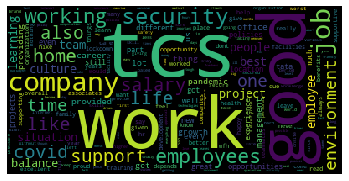

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [29]:
!pip install cufflinks --upgrade

Requirement already up-to-date: cufflinks in /home/siddharth/anaconda3/lib/python3.7/site-packages (0.17.3)


In [30]:
#https://medium.com/plotly/nlp-visualisations-for-clear-immediate-insights-into-text-data-and-outputs-9ebfab168d5b
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [31]:
data1['clean_round_1'].iplot(
    kind='hist',
    bins=50,
    xTitle='clean_round_1',
    linecolor='black',
    yTitle='page_index',
    title='Sentiment Polarity Distribution')

In [32]:
data1['clean_round_1'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [33]:
data1.insert(10, "rev_len_positive", "")

In [34]:
for i in range (0,len(data1)):
    print(len(data1.clean_round_1[i]),"",data1.clean_round_1[i])
    data1.rev_len_positive[i]=len(data1.clean_round_1[i])
    

552  things good job security opinion people tcs job security tcs holds onto employees even tough situations market although large layoff recent past still job security plus balance good time pressure also work much challenging usually timid learning curve easy workwise support projects timing may issue one may support weekend night compensated development projects timing beginning casual time delivery haywire always time lot development left give idea poor management benefits nice health benefits employee family easy leaves maternity wedding etc read
191  carrying company provided laptop pandemic hits devops engineer already vpn admin privileges turned long faced lag wfh period company also providing internet connection charges quite happy tcs
67  draw salary without work even without going office single day month
125  good excellent job security provided tcs pandemic good company policies excellent support employes providing work home option
150  apart job security company provides v

45  overall goodmanagement goodappreciated enough
53  tcs supporting lockdown good way cancelling increment
111  company giving full support expect good organisation really good environment culture compay feel proud part tcs
54  enabling sbws tcs facilities employees work home fight
41  job good pay better compensation benefits
26  depends project good arent
16  tcs fundamentals
28  supporting lot pandemic time
82  tcs helping every possible way happy part organisation helps employees like family
38  work environment training job security
453  good place work true professional want learninggrowth career company definitely gone days tcs used pay lot employees old employees hold high positions company take lot money give poor salary people low ranksin name appraisals bootlickers get good reviews one thing position someone switching tcs shehe get salary compared already working tcs beforehand ya job security workculture peoplementality filthy downmarket particularly noida kolkata branch r

In [35]:
data1

Unnamed: 0                   date  \
0             0  posted on 05 Sep 2018   
1             1  posted on 12 Aug 2020   
2             2  posted on 26 Jul 2019   
3             3  posted on 29 Aug 2020   
4             4  posted on 21 Aug 2020   
..          ...                    ...   
514          65  posted on 29 Jan 2020   
515          66  posted on 07 Jun 2020   
516          67  posted on 04 Jun 2020   
517          68  posted on 05 Jun 2020   
518          69  posted on 13 Mar 2020   

                                             tital  \
0                      System Engineer  in Kolkata   
1                           It Analyst  in Kolkata   
2               Associate Consultant  in Bangalore   
3       Assistant Consultant (ITIS)  in Whitefield   
4               Assistant System Engineer  in Pune   
..                                             ...   
514                         It Analyst  in Kolkata   
515                             Associate  in Pune   
516  Office Boy for 4.9 years in Kolkata, Rajarhat   
517              Senior Associate  in Pune Bhosari   
518      Associate Technical Consultant  in Mumbai   

                                                  user  \
0                     Anonymous · Finance Division       
1                         Anonymous · IoT Division       
2                         Anonymous · EIS Division       
3                        Anonymous · ITIS Division       
4                 Anonymous · It Services Division       
..                                                 ...   
514                       Anonymous · bfs Division       
515               Anonymous · Us Mortgage Division       
516   Anonymous · Former Employee · Office boy Divi...   
517         Anonymous · Banking & Finance Division       
518                       Anonymous · BPO Division       

                                               dislike  \
0    Dislikes 1. Growth: Not much scope of growth. ...   
1    Dislikes Some of the managers are lagging with...   
2    Dislikes 1. First of all, everybody in TCS are...   
3     Dislikes Nothing to dislike about working at TCS   
4    Dislikes Salary appraisal is very low for begi...   
..                                                 ...   
514  Dislikes 1.Poor Work Life balance, specially i...   
515             Dislikes No opportunity to join again    
516                           Dislikes Admin pressures   
517                                   Dislikes nothing   
518  Dislikes The company's alumni portal services ...   

                                                  like  page_index  \
0    Likes Few things that are good: \r\n1. Job sec...           2   
1    Likes I am carrying company provided laptop be...           2   
2    Likes You can draw salary without doing any wo...           2   
3    Likes Good and excellent job security provided...           2   
4    Likes Apart from Job security the company prov...           2   
..                                                 ...         ...   
514                                Likes Job Security.          37   
515  Likes This is Ganesh currently I am not a empl...          37   
516                 Likes I am not working right now 😔          37   
517  Likes traning language is very soft.no politic...          37   
518  Likes The company is better with their monthly...          37   

                                         clean_round_1  \
0    things good job security opinion people tcs jo...   
1    carrying company provided laptop pandemic hits...   
2    draw salary without work even without going of...   
3    good excellent job security provided tcs pande...   
4    apart job security company provides various op...   
..                                                 ...   
514                                       job security   
515  ganesh currently employee tcs still love exper...   
516                                     working right    
517  traning language softno politic

In [36]:
data1['rev_len_positive'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [37]:
data1['tital'].iplot(
    kind='hist',
    bins=100,
    xTitle='tital',
    linecolor='black',
    yTitle='count',
    title='tital')

In [38]:
!pip install networkx

In [39]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

In [40]:
data1

Unnamed: 0                   date  \
0             0  posted on 05 Sep 2018   
1             1  posted on 12 Aug 2020   
2             2  posted on 26 Jul 2019   
3             3  posted on 29 Aug 2020   
4             4  posted on 21 Aug 2020   
..          ...                    ...   
514          65  posted on 29 Jan 2020   
515          66  posted on 07 Jun 2020   
516          67  posted on 04 Jun 2020   
517          68  posted on 05 Jun 2020   
518          69  posted on 13 Mar 2020   

                                             tital  \
0                      System Engineer  in Kolkata   
1                           It Analyst  in Kolkata   
2               Associate Consultant  in Bangalore   
3       Assistant Consultant (ITIS)  in Whitefield   
4               Assistant System Engineer  in Pune   
..                                             ...   
514                         It Analyst  in Kolkata   
515                             Associate  in Pune   
516  Office Boy for 4.9 years in Kolkata, Rajarhat   
517              Senior Associate  in Pune Bhosari   
518      Associate Technical Consultant  in Mumbai   

                                                  user  \
0                     Anonymous · Finance Division       
1                         Anonymous · IoT Division       
2                         Anonymous · EIS Division       
3                        Anonymous · ITIS Division       
4                 Anonymous · It Services Division       
..                                                 ...   
514                       Anonymous · bfs Division       
515               Anonymous · Us Mortgage Division       
516   Anonymous · Former Employee · Office boy Divi...   
517         Anonymous · Banking & Finance Division       
518                       Anonymous · BPO Division       

                                               dislike  \
0    Dislikes 1. Growth: Not much scope of growth. ...   
1    Dislikes Some of the managers are lagging with...   
2    Dislikes 1. First of all, everybody in TCS are...   
3     Dislikes Nothing to dislike about working at TCS   
4    Dislikes Salary appraisal is very low for begi...   
..                                                 ...   
514  Dislikes 1.Poor Work Life balance, specially i...   
515             Dislikes No opportunity to join again    
516                           Dislikes Admin pressures   
517                                   Dislikes nothing   
518  Dislikes The company's alumni portal services ...   

                                                  like  page_index  \
0    Likes Few things that are good: \r\n1. Job sec...           2   
1    Likes I am carrying company provided laptop be...           2   
2    Likes You can draw salary without doing any wo...           2   
3    Likes Good and excellent job security provided...           2   
4    Likes Apart from Job security the company prov...           2   
..                                                 ...         ...   
514                                Likes Job Security.          37   
515  Likes This is Ganesh currently I am not a empl...          37   
516                 Likes I am not working right now 😔          37   
517  Likes traning language is very soft.no politic...          37   
518  Likes The company is better with their monthly...          37   

                                         clean_round_1  \
0    things good job security opinion people tcs jo...   
1    carrying company provided laptop pandemic hits...   
2    draw salary without work even without going of...   
3    good excellent job security provided tcs pande...   
4    apart job security company provides various op...   
..                                                 ...   
514                                       job security   
515  ganesh currently employee tcs still love exper...   
516                                     working right    
517  traning language softno politic

In [42]:
#!/usr/bin/env python
# coding: utf-8
import nltk
import pandas as pd 
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

In [43]:
def read_article(file_name):
    filedata=file_name
    article = filedata.split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

In [44]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

In [45]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

In [46]:
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/siddharth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
def generate_summary(file_name, top_n=5):
    
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    try:
        scores = nx.pagerank(sentence_similarity_graph)
    except Exception as e:
        print(e)
        return("NaN")

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    #print("Indexes of top ranked_sentence order are ", ranked_sentence)    
    for i in range(top_n):
        try:
            #print("top_n---->",top_n)
            #print("ranked_sentence----->",ranked_sentence)
            summarize_text.append(" ".join(ranked_sentence[i][1]))
            return('nan')
        except Exception as e:
            print(e)
            pass

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

# let's begin
for i in data1.clean_round_1:
    generate_summary( i, 2)

things good job security opinion people tcs job security tcs holds onto employees even tough situations market although large layoff recent past still job security plus balance good time pressure also work much challenging usually timid learning curve easy workwise support projects timing may issue one may support weekend night compensated development projects timing beginning casual time delivery haywire always time lot development left give idea poor management benefits nice health benefits employee family easy leaves maternity wedding etc read
list index out of range
list index out of range
Summarize Text: 
 
carrying company provided laptop pandemic hits devops engineer already vpn admin privileges turned long faced lag wfh period company also providing internet connection charges quite happy tcs
list index out of range
list index out of range
Summarize Text: 
 
draw salary without work even without going office single day month
list index out of range
list index out of range
Summa

Summarize Text: 
 
tcs provided personal desktop first week march hr continuously enquiring us facing issues
list index out of range
list index out of range
Summarize Text: 
 
overall goodmanagement goodappreciated enough
list index out of range
list index out of range
Summarize Text: 
 
tcs supporting lockdown good way cancelling increment
list index out of range
list index out of range
Summarize Text: 
 
company giving full support expect good organisation really good environment culture compay feel proud part tcs
list index out of range
list index out of range
Summarize Text: 
 
enabling sbws tcs facilities employees work home fight
list index out of range
list index out of range
Summarize Text: 
 
job good pay better compensation benefits
list index out of range
list index out of range
Summarize Text: 
 
depends project good arent
list index out of range
list index out of range
Summarize Text: 
 
tcs fundamentals
list index out of range
list index out of range
Summarize Text: 
 
su